In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('creditcard_2023.csv')

df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df.shape

(568630, 31)

In [6]:
df.isnull().sum(axis = 0)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum(axis = 0)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.shape

(568630, 31)

In [9]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [19]:
y = df['Class']
X = df.drop('Class', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.3, random_state = 0)

In [11]:
def zscore_normalize_features(X):

    mu     = np.mean(X, axis=0)                 
    sigma  = np.std(X, axis=0)                 
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 

In [ ]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
	clf = KNeighborsClassifier(n_neighbors = k)
	clf.fit(X_train, y_train)

	training_score = clf.score(X_train, y_train)
	test_score = clf.score(X_test, y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

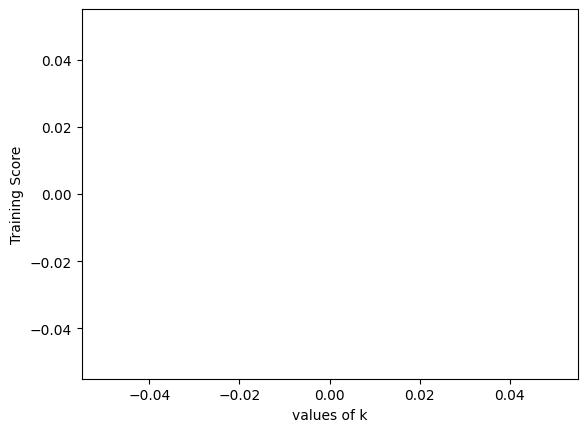

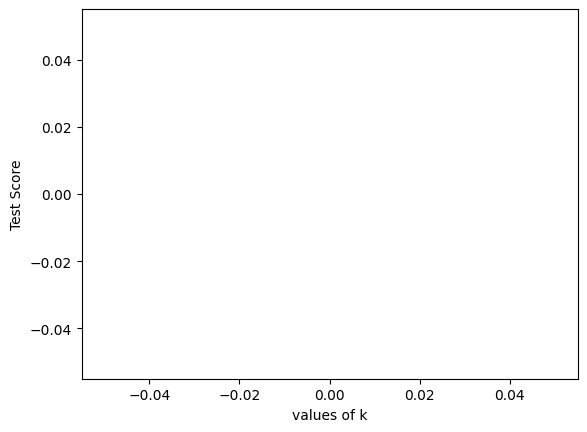

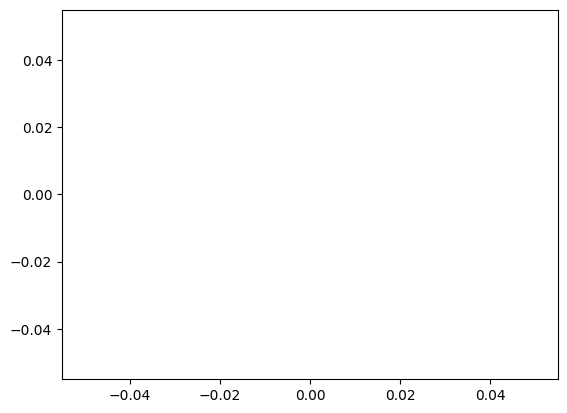

In [16]:
# train score.
plt.plot(K, training, marker='o', color='k')
plt.xlabel('values of k')
plt.ylabel('Training Score')
plt.show()

# Test score.

plt.plot(K, test, marker='o', color='g')
plt.xlabel('values of k')
plt.ylabel('Test Score')
plt.show()

# Train score Vs. test score

plt.scatter(K, training, color='k')
plt.scatter(K, test, color='g')
plt.show()

In [17]:
V = df[[ 'id' , 'V1', 'V2' , 'V3' , 'V4' , 'Amount']]

print(V)

            id        V1        V2        V3        V4    Amount
0            0 -0.260648 -0.469648  2.496266 -0.083724  17982.10
1            1  0.985100 -0.356045  0.558056 -0.429654   6531.37
2            2 -0.260272 -0.949385  1.728538 -0.457986   2513.54
3            3 -0.152152 -0.508959  1.746840 -1.090178   5384.44
4            4 -0.206820 -0.165280  1.527053 -0.448293  14278.97
...        ...       ...       ...       ...       ...       ...
568625  568625 -0.833437  0.061886 -0.899794  0.904227   4394.16
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328   4653.40
568627  568627 -0.311997 -0.004095  0.137526 -0.035893  23572.85
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  10160.83
568629  568629 -0.795144  0.433236 -0.649140  0.374732  21493.92

[568630 rows x 6 columns]


In [20]:
df = pd.DataFrame(X)
df = df.astype(str)
vectorizer = TfidfVectorizer()
vectorized_documents = vectorizer.fit_transform(df.values.ravel())

print(vectorized_documents)

NameError: name 'TfidfVectorizer' is not defined

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [ ]:
wcss = []
for i in range(1, 700):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(vectorized_documents)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 700), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
results = pd.DataFrame()

results['document'] = sentence
results['cluster'] = kmeans.labels_

results.head()

In [ ]:
print(results.sample(5))

In [ ]:
colors = ['red', 'green']
cluster = ['Not a fraud','fraud']
for i in range(num_clusters):
	plt.scatter(reduced_data[kmeans.labels_ == i, 0],
				reduced_data[kmeans.labels_ == i, 1],
				s=10, color=colors[i],
				label=f' {cluster[i]}')
plt.legend()
plt.show()
